In [2]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)
print('Successful!')

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.0.2
Successful!


Evaluating TS.......... 0.2 seconds
Regret: 16.20 +/- 1.62 (median: 16.50, max: 25.00, min: 9.00)
Evaluating PHE.......... 0.1 seconds
Regret: 15.40 +/- 1.97 (median: 18.00, max: 24.00, min: 3.00)
Evaluating PHE.......... 0.1 seconds
Regret: 12.30 +/- 3.18 (median: 13.50, max: 30.00, min: -6.00)
Evaluating Histroy-Swapping.......... 0.2 seconds
Regret: 6.80 +/- 2.02 (median: 5.00, max: 20.00, min: 0.00)
Evaluating Histroy-Swapping.......... 0.8 seconds
Regret: 7.70 +/- 1.61 (median: 9.00, max: 13.00, min: -4.00)
Evaluating Histroy-Swapping.......... 0.7 seconds
Regret: 11.70 +/- 1.64 (median: 10.50, max: 21.00, min: 4.00)
Evaluating Histroy-Swapping.......... 0.3 seconds
Regret: 13.60 +/- 1.25 (median: 14.00, max: 20.00, min: 8.00)
Evaluating TS.......... 0.1 seconds
Regret: 11.48 +/- 1.00 (median: 10.63, max: 16.16, min: 5.53)
Evaluating PHE.......... 0.1 seconds
Regret: 14.76 +/- 0.87 (median: 14.98, max: 20.19, min: 10.78)
Evaluating PHE.......... 0.1 seconds
Regret: 10.75 +/- 0.95 

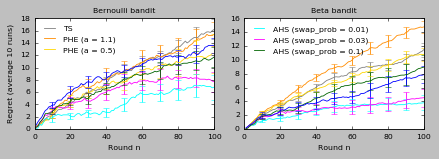

In [3]:
import datetime

algs = [
  ("TS", {}, "gray", "-", "TS"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
  ("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
  ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  ("HistorySwapping", {"swap_prob": 0.01}, "cyan", "-", "AHS (swap_prob = 0.01)"),
  ("HistorySwapping", {"swap_prob": 0.03}, "magenta", "-", "AHS (swap_prob = 0.03)"),
  ("HistorySwapping", {"swap_prob": 0.1}, "darkgreen", "-", "AHS (swap_prob = 0.1)"),
  ("HistorySwapping", {"swap_prob": 0.15}, "blue", "-", "AHS (swap_prob = 0.15)"),
]
num_runs = 10
n = 100
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(5.5, 2))
for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate_parallel(alg_class, alg[1], env, n, num_process=2)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 3 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()

now = datetime.datetime.now()
with open("../results/HS_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()